In [21]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

In [3]:
hdulist = fits.open('data/allStarLite-dr17-synspec_rev1.fits')

In [4]:
hdu1_data = hdulist[1].data

In [5]:
df4 = pd.DataFrame(hdu1_data.tolist(), columns=hdu1_data.names)

In [6]:
df = df4

In [7]:
df = df.drop_duplicates(subset=['APOGEE_ID'])

In [8]:
df_classes= pd.read_csv("classes.csv")

In [9]:
df_classes

,apogee_id,class_spectral,class_lum_logg,class_lum_jhk,class_lum_bins_logg,class_lum_bins_jhk
0,2M00000019-1924498,G,V,Ia,7,3
1,2M00000032+5737103,F,V,II,6,3
2,2M00000032+5737103,F,V,II,6,3
3,2M00000068+5710233,K,IV,II,5,3
4,2M00000103+1525513,G,V,III,6,4
...,...,...,...,...,...,...
594006,2M23595837+5700444,K,III,II,3,5
594007,2M23595846+1503028,G,V,III,7,4
594008,2M23595886+5726058,K,III,II,3,4
594009,2M23595921+5609479,K,III,II,3,4


In [10]:
df

,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,...,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
0,VESTA,apo1m,calibration,,NaN,NaN,292.219131,-30.602919,99.999001,0.000,...,0.010266,0,NaN,NaN,0.059403,2,NaN,NaN,NaN,64
1,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597000,0.039,...,0.010609,0,NaN,NaN,0.001221,2,NaN,NaN,NaN,64
2,2M00000019-1924498,apo25m,060-75,none,0.000832,-19.413851,63.394122,-75.906397,11.074000,0.022,...,0.013835,0,NaN,NaN,0.102594,2,NaN,NaN,NaN,64
3,2M00000032+5737103,apo25m,116-04,none,0.001335,57.619530,116.065371,-4.564768,10.905000,0.023,...,0.016555,0,NaN,NaN,0.123839,2,NaN,NaN,NaN,64
5,2M00000035-7323394,lco25m,SMC12,none,0.001467,-73.394287,307.939441,-43.230305,15.008000,0.045,...,0.053997,0,NaN,NaN,0.276795,2,-0.155160,-0.099500,0.146837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733896,2M23595886-2009435,apo25m,060-75,none,359.995258,-20.162107,60.806239,-76.324013,11.788000,0.022,...,NaN,0,NaN,NaN,NaN,258,NaN,NaN,NaN,64
733897,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466000,0.024,...,0.011980,0,NaN,NaN,NaN,259,-0.058750,-0.003090,0.072443,0
733898,2M23595921+5609479,apo25m,NGC7789_MGA,none,359.996744,56.163330,115.771964,-5.991363,11.985000,0.023,...,0.017686,0,NaN,NaN,NaN,259,-0.103446,-0.047786,0.097572,0
733899,2M23595949-7342592,lco25m,SMC12,none,359.997887,-73.716454,307.821174,-42.919934,15.924000,0.094,...,0.049855,0,NaN,NaN,0.174322,2,0.107710,0.163370,0.140188,0


In [11]:
# Fusionner les DataFrames avec une fusion gauche
df_merged = pd.merge(df_classes, df, left_on='apogee_id', right_on='APOGEE_ID', how='inner')

In [12]:
df_merged

,apogee_id,class_spectral,class_lum_logg,class_lum_jhk,class_lum_bins_logg,class_lum_bins_jhk,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,...,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
0,2M00000019-1924498,G,V,Ia,7,3,2M00000019-1924498,apo25m,060-75,none,...,0.013835,0,NaN,NaN,0.102594,2,NaN,NaN,NaN,64
1,2M00000032+5737103,F,V,II,6,3,2M00000032+5737103,apo25m,116-04,none,...,0.016555,0,NaN,NaN,0.123839,2,NaN,NaN,NaN,64
2,2M00000032+5737103,F,V,II,6,3,2M00000032+5737103,apo25m,116-04,none,...,0.016555,0,NaN,NaN,0.123839,2,NaN,NaN,NaN,64
3,2M00000068+5710233,K,IV,II,5,3,2M00000068+5710233,apo25m,N7789,none,...,0.011601,0,NaN,NaN,0.004401,2,-0.055580,0.000080,0.086572,0
4,2M00000103+1525513,G,V,III,6,4,2M00000103+1525513,apo25m,107-46_MGA,none,...,0.019600,0,NaN,NaN,0.133414,2,NaN,NaN,NaN,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594006,2M23595837+5700444,K,III,II,3,5,2M23595837+5700444,apo25m,N7789,none,...,0.022493,0,NaN,NaN,0.016774,2,-0.035640,0.020020,0.141408,0
594007,2M23595846+1503028,G,V,III,7,4,2M23595846+1503028,apo25m,107-46_MGA,none,...,0.023919,0,NaN,NaN,0.077250,2,NaN,NaN,NaN,64
594008,2M23595886+5726058,K,III,II,3,4,2M23595886+5726058,apo25m,116-04,none,...,0.011980,0,NaN,NaN,NaN,259,-0.058750,-0.003090,0.072443,0
594009,2M23595921+5609479,K,III,II,3,4,2M23595921+5609479,apo25m,NGC7789_MGA,none,...,0.017686,0,NaN,NaN,NaN,259,-0.103446,-0.047786,0.097572,0


In [33]:
df = df_merged

In [51]:
variable_selection = ["J", "H", "K","LOGG", "M_H", "VMICRO", "VMACRO", "VSINI", 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE', 
    'TI_FE', 'TIII_FE', 'V_FE', 'CR_FE', 'MN_FE', 'CO_FE', 'NI_FE', 'CE_FE', 'FE_H']

variable_classe =["apogee_id","class_spectral","class_lum_logg","class_lum_jhk","class_lum_bins_logg","class_lum_bins_jhk"]

In [52]:
df = df[variable_selection]

<function matplotlib.pyplot.show(close=None, block=None)>

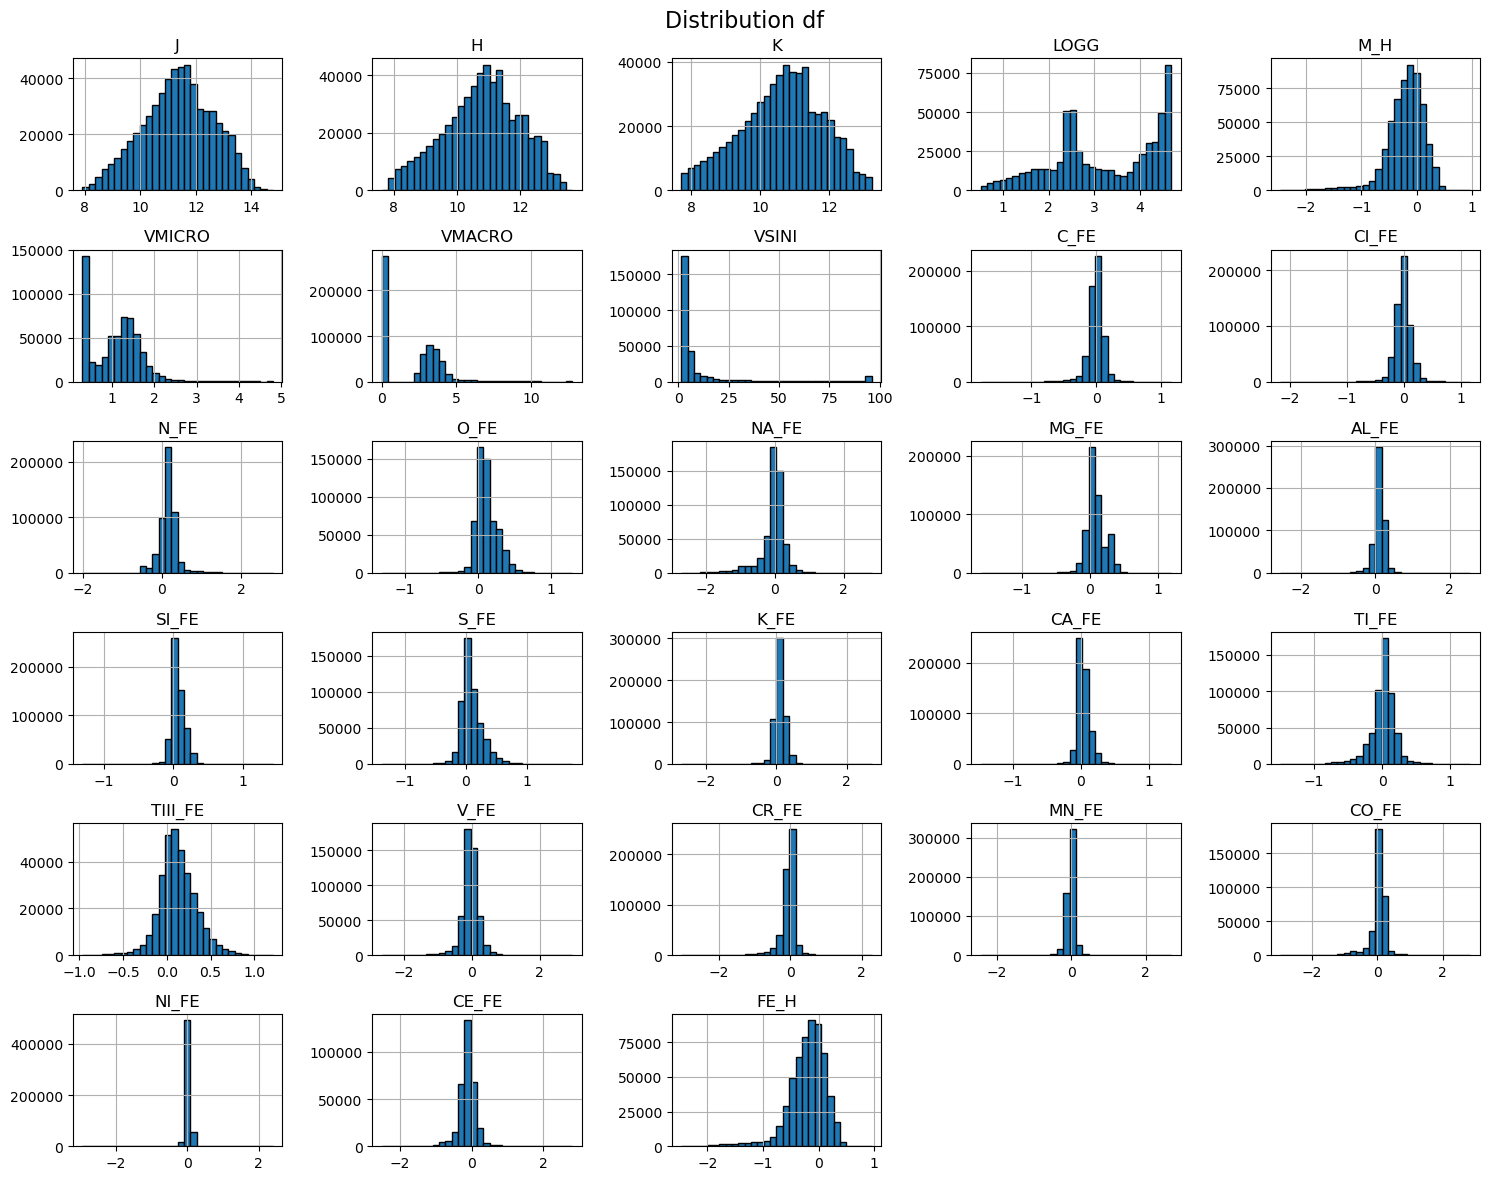

In [53]:
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution df',fontsize=16)
plt.tight_layout()
plt.show

In [54]:
print("Valeurs abberantes J :",(df["J"] > 30).sum())
print("Valeurs abberantes H :",(df["H"] > 30).sum())
print("Valeurs abberantes K :",(df["K"] > 30).sum())
#Drop  les lignes?

Valeurs abberantes J : 0
Valeurs abberantes H : 0
Valeurs abberantes K : 0


In [55]:


# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation à toutes les colonnes du DataFrame
df_standardized = scaler.fit_transform(df)

# Convertir le résultat en DataFrame pour conserver les noms de colonnes
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

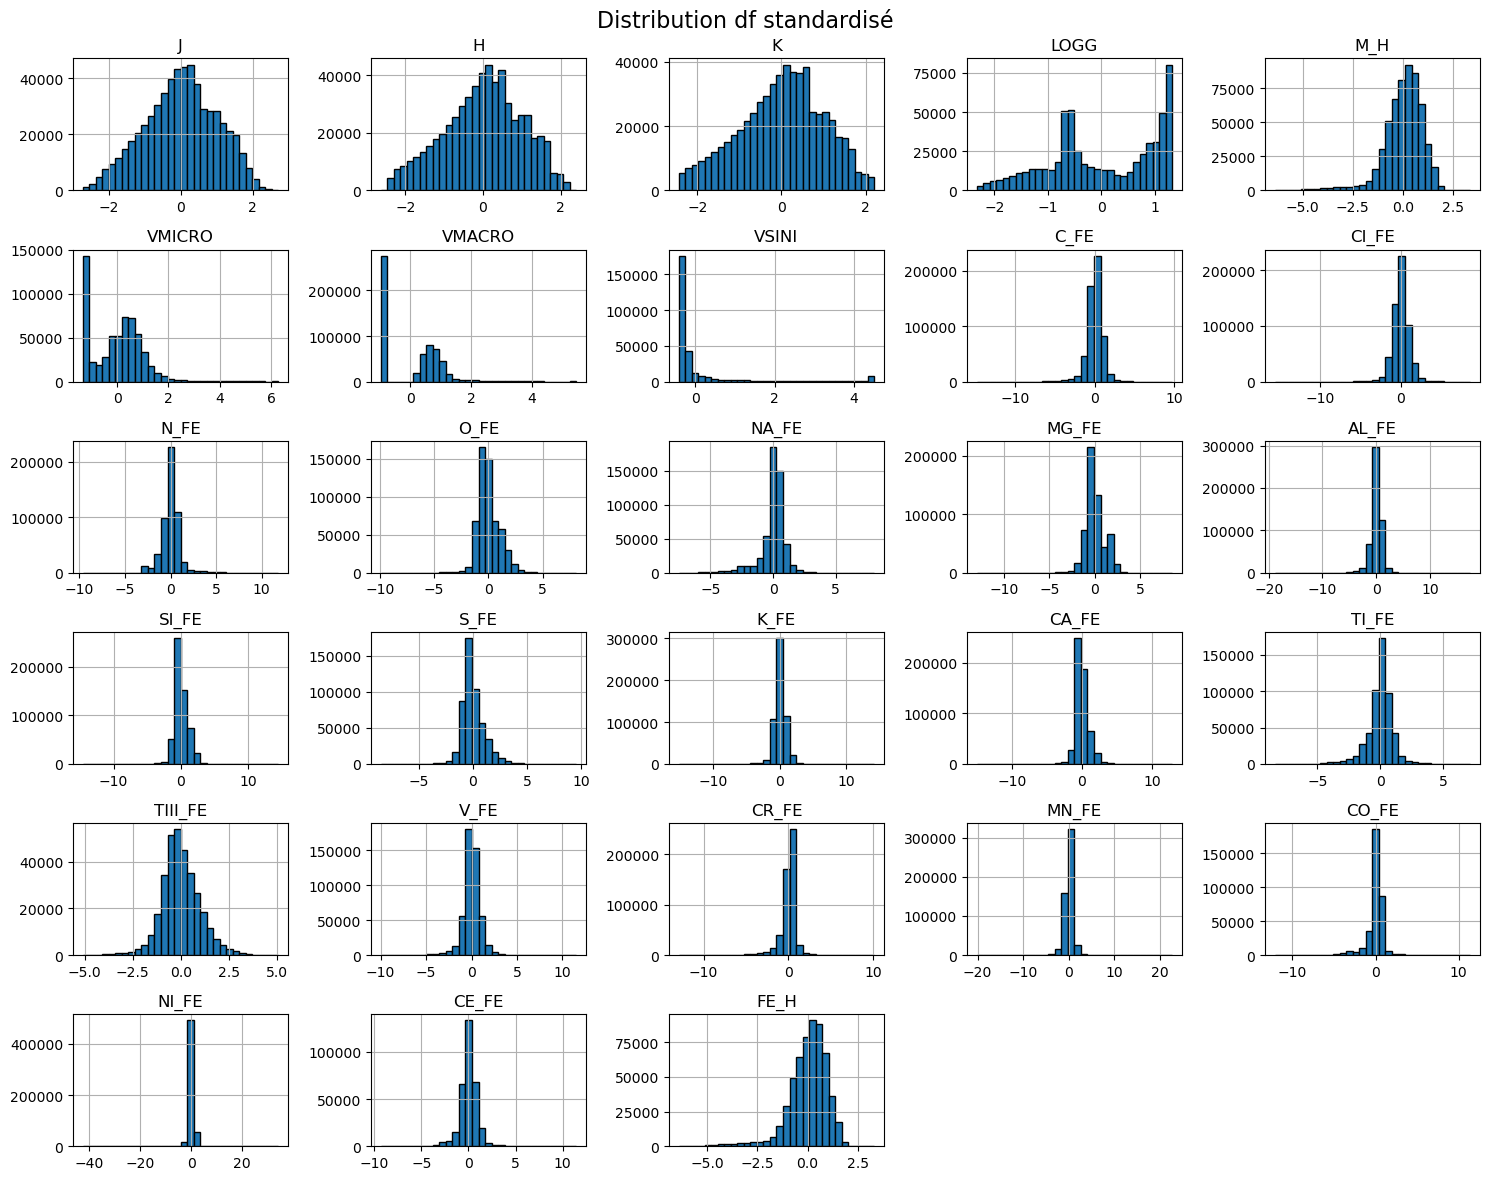

In [56]:
df_standardized.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution df standardisé',fontsize=16)
plt.tight_layout()
plt.show

In [57]:
# Créer un objet MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation Min-Max à toutes les colonnes du DataFrame
df_normalized = scaler.fit_transform(df)

# Convertir le résultat en DataFrame pour conserver les noms de colonnes
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

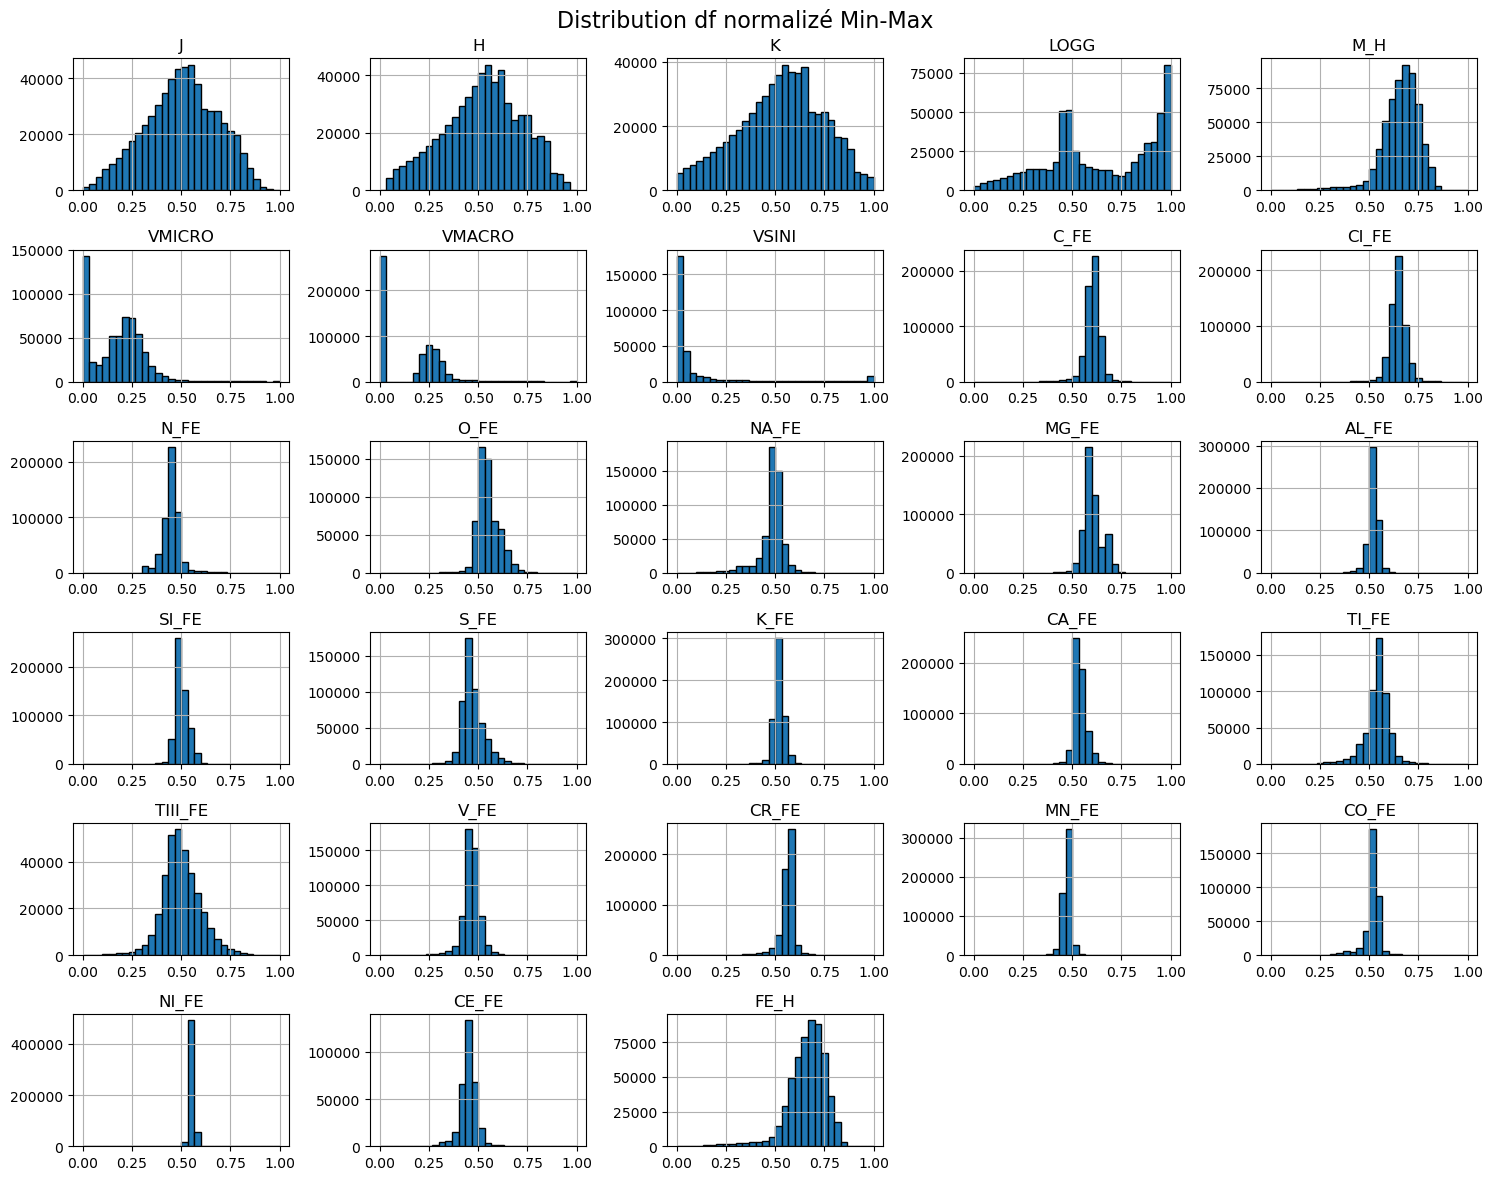

In [58]:
df_normalized.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution df normalizé Min-Max',fontsize=16)
plt.tight_layout()
plt.show

In [59]:
df_standardized.describe()

,J,H,K,LOGG,M_H,VMICRO,VMACRO,VSINI,C_FE,CI_FE,...,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CE_FE,FE_H
count,5.940110e+05,5.940110e+05,5.940110e+05,5.940110e+05,5.704300e+05,5.940110e+05,5.940110e+05,2.759880e+05,5.688580e+05,5.672110e+05,...,5.606780e+05,5.328330e+05,3.304710e+05,4.948570e+05,5.177370e+05,5.290150e+05,3.452730e+05,5.674550e+05,3.228880e+05,5.704690e+05
mean,-1.135890e-16,1.864123e-16,2.168431e-16,1.701443e-16,-1.661666e-16,-1.517710e-16,-1.224886e-17,-1.812478e-17,-2.558093e-17,-4.810351e-17,...,-1.125355e-17,-4.373941e-17,2.838120e-17,2.983706e-17,2.195841e-19,-2.734639e-17,3.144495e-17,2.704659e-17,2.024539e-17,9.625544e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000002e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000002e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000002e+00,1.000001e+00
min,-2.722868e+00,-2.633621e+00,-2.441320e+00,-2.332727e+00,-6.387543e+00,-1.338218e+00,-9.776324e-01,-4.229407e-01,-1.478259e+01,-1.571832e+01,...,-1.499578e+01,-8.418664e+00,-5.092108e+00,-9.988055e+00,-1.293426e+01,-2.022586e+01,-1.215499e+01,-4.259506e+01,-9.325359e+00,-6.416347e+00
25%,-6.779002e-01,-6.689052e-01,-6.685020e-01,-6.914325e-01,-4.681201e-01,-1.030323e+00,-9.776324e-01,-4.213271e-01,-4.288330e-01,-5.232305e-01,...,-5.409679e-01,-3.662749e-01,-6.047309e-01,-4.323508e-01,-2.023439e-01,-3.873702e-01,-1.837785e-01,-4.087837e-01,-4.061772e-01,-4.723734e-01
50%,3.015505e-02,6.043988e-02,7.304203e-02,-8.529666e-02,1.360456e-01,1.070643e-01,3.251789e-01,-3.452747e-01,4.985641e-02,1.133253e-02,...,-1.445485e-01,7.509429e-02,-8.259282e-02,-2.622494e-03,1.906404e-01,5.499663e-02,1.728922e-01,5.860631e-02,2.216089e-02,1.433369e-01
75%,7.239552e-01,7.044722e-01,6.911351e-01,1.008567e+00,6.454674e-01,6.371251e-01,7.729363e-01,-1.524172e-01,5.368446e-01,5.365811e-01,...,4.069514e-01,5.307127e-01,5.796616e-01,5.124579e-01,4.364181e-01,4.910911e-01,4.469842e-01,4.949930e-01,4.753728e-01,6.503165e-01
max,2.710314e+00,2.401538e+00,2.206135e+00,1.331150e+00,3.337876e+00,6.278540e+00,5.471473e+00,4.520888e+00,9.741913e+00,8.658109e+00,...,1.285504e+01,7.171845e+00,5.078923e+00,1.153177e+01,1.016354e+01,2.268798e+01,1.139694e+01,3.417621e+01,1.146354e+01,3.313160e+00


In [60]:
df_normalized.describe()

,J,H,K,LOGG,M_H,VMICRO,VMACRO,VSINI,C_FE,CI_FE,...,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,CE_FE,FE_H
count,594011.000000,594011.000000,594011.000000,594011.000000,570430.000000,594011.000000,594011.000000,275988.000000,568858.000000,567211.000000,...,560678.000000,532833.000000,330471.000000,494857.000000,517737.000000,529015.000000,345273.000000,567455.000000,322888.000000,570469.000000
mean,0.501155,0.523046,0.525303,0.636683,0.656788,0.175694,0.151592,0.085549,0.602768,0.644816,...,0.538432,0.539986,0.500648,0.464133,0.559978,0.471313,0.516093,0.554831,0.448574,0.659473
std,0.184054,0.198604,0.215172,0.272935,0.102823,0.131290,0.155060,0.202273,0.040776,0.041023,...,0.035906,0.064142,0.098319,0.046469,0.043294,0.023303,0.042459,0.013026,0.048103,0.102780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376385,0.390199,0.381460,0.447967,0.608655,0.040423,0.000000,0.000326,0.585282,0.623352,...,0.519009,0.516493,0.441192,0.444042,0.551218,0.462287,0.508290,0.549506,0.429036,0.610922
50%,0.506705,0.535050,0.541019,0.613402,0.670777,0.189750,0.202014,0.015710,0.604801,0.645281,...,0.533242,0.544803,0.492528,0.464011,0.568232,0.472595,0.523434,0.555594,0.449640,0.674205
75%,0.634402,0.662957,0.674015,0.911956,0.723158,0.259342,0.271444,0.054719,0.624658,0.666829,...,0.553044,0.574027,0.557640,0.487946,0.578872,0.482757,0.535072,0.561278,0.471441,0.726313
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# Initialiser un dictionnaire pour stocker les résultats
normality_results = {}

# Parcourir les colonnes numériques du DataFrame
for col in df.columns:
    stat, p_value = shapiro(df[col].dropna())  # Tester en ignorant les NaN
    normality_results[col] = {"statistic": stat, "p_value": p_value}

# Convertir les résultats en DataFrame pour les visualiser
results_df = pd.DataFrame(normality_results).T
results_df["normality"] = results_df["p_value"] > 0.05  # True si les données suivent une loi normale

# Afficher les résultats
print(results_df)

c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 594011.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 570430.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 275988.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568858.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packag

         statistic        p_value  normality
J         0.993047   2.542003e-74      False
H         0.988788   1.765622e-85      False
K         0.988171   8.844772e-87      False
LOGG      0.923590  2.469565e-138      False
M_H       0.893936  5.217422e-148      False
VMICRO    0.913939  4.931105e-142      False
VMACRO    0.804367  6.309135e-169      False
VSINI     0.448313  5.479730e-190      False
C_FE      0.890762  6.574092e-149      False
CI_FE     0.948474  9.350604e-126      False
N_FE      0.889808  8.493201e-148      False
O_FE      0.954662  4.497360e-122      False
NA_FE     0.831134  1.853619e-161      False
MG_FE     0.958941  3.065744e-119      False
AL_FE     0.916245  4.372395e-139      False
SI_FE     0.955320  1.126246e-121      False
S_FE      0.940552  2.217594e-128      False
K_FE      0.815164  4.313265e-166      False
CA_FE     0.875432  6.508956e-153      False
TI_FE     0.932108  4.800684e-133      False
TIII_FE   0.982362   8.815065e-89      False
V_FE      

In [62]:
# Initialiser un dictionnaire pour stocker les résultats
normality_results = {}

# Parcourir les colonnes numériques du DataFrame
for col in df_standardized.columns:
    stat, p_value = shapiro(df_standardized[col].dropna())  # Tester en ignorant les NaN
    normality_results[col] = {"statistic": stat, "p_value": p_value}

# Convertir les résultats en DataFrame pour les visualiser
results_df = pd.DataFrame(normality_results).T
results_df["normality"] = results_df["p_value"] > 0.05  # True si les données suivent une loi normale

# Afficher les résultats
print(results_df)

c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 594011.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 570430.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 275988.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568858.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packag

         statistic        p_value  normality
J         0.993047   2.542003e-74      False
H         0.988788   1.765622e-85      False
K         0.988171   8.844772e-87      False
LOGG      0.923590  2.469565e-138      False
M_H       0.893936  5.217422e-148      False
VMICRO    0.913939  4.931105e-142      False
VMACRO    0.804367  6.309135e-169      False
VSINI     0.448313  5.479730e-190      False
C_FE      0.890762  6.574092e-149      False
CI_FE     0.948474  9.350604e-126      False
N_FE      0.889808  8.493201e-148      False
O_FE      0.954662  4.497360e-122      False
NA_FE     0.831134  1.853619e-161      False
MG_FE     0.958941  3.065744e-119      False
AL_FE     0.916245  4.372395e-139      False
SI_FE     0.955320  1.126246e-121      False
S_FE      0.940552  2.217594e-128      False
K_FE      0.815164  4.313265e-166      False
CA_FE     0.875432  6.508956e-153      False
TI_FE     0.932108  4.800684e-133      False
TIII_FE   0.982362   8.815065e-89      False
V_FE      

c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 529015.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 345273.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 567455.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 322888.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packag

In [63]:
# Initialiser un dictionnaire pour stocker les résultats
normality_results = {}

# Parcourir les colonnes numériques du DataFrame
for col in df_normalized.columns:
    stat, p_value = shapiro(df_normalized[col].dropna())  # Tester en ignorant les NaN
    normality_results[col] = {"statistic": stat, "p_value": p_value}

# Convertir les résultats en DataFrame pour les visualiser
results_df = pd.DataFrame(normality_results).T
results_df["normality"] = results_df["p_value"] > 0.05  # True si les données suivent une loi normale

# Afficher les résultats
print(results_df)

c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 594011.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 570430.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 275988.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568858.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packag

         statistic        p_value  normality
J         0.993047   2.542003e-74      False
H         0.988788   1.765622e-85      False
K         0.988171   8.844772e-87      False
LOGG      0.923590  2.469565e-138      False
M_H       0.893936  5.217422e-148      False
VMICRO    0.913939  4.931105e-142      False
VMACRO    0.804367  6.309135e-169      False
VSINI     0.448313  5.479730e-190      False
C_FE      0.890762  6.574092e-149      False
CI_FE     0.948474  9.350604e-126      False
N_FE      0.889808  8.493201e-148      False
O_FE      0.954662  4.497360e-122      False
NA_FE     0.831134  1.853619e-161      False
MG_FE     0.958941  3.065744e-119      False
AL_FE     0.916245  4.372395e-139      False
SI_FE     0.955320  1.126246e-121      False
S_FE      0.940552  2.217594e-128      False
K_FE      0.815164  4.313265e-166      False
CA_FE     0.875432  6.508956e-153      False
TI_FE     0.932108  4.800684e-133      False
TIII_FE   0.982362   8.815065e-89      False
V_FE      

c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 529015.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 345273.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 567455.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 322888.
  res = hypotest_fun_out(*samples, **kwds)
c:\utfr\apps\anaconda3\2024.10-1\Lib\site-packag

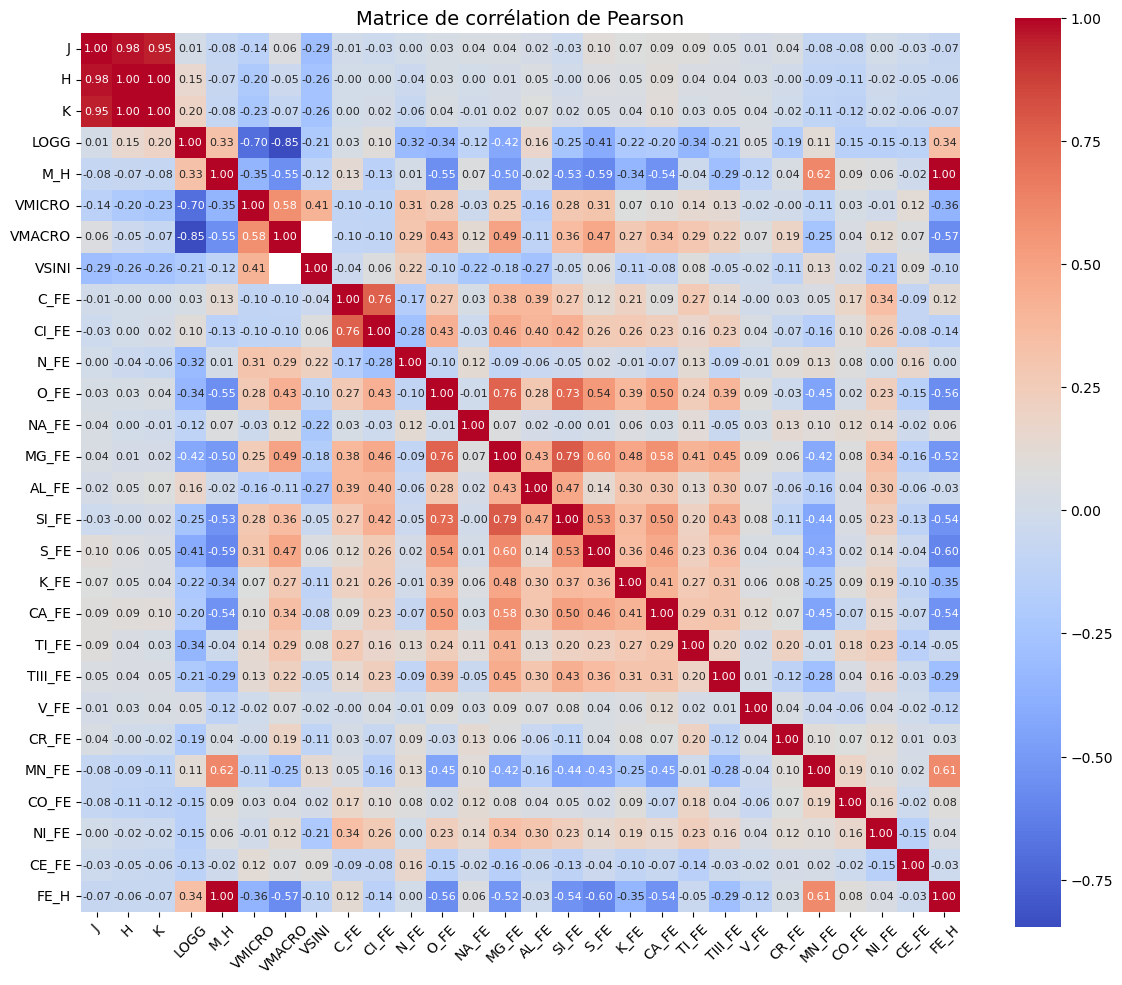

In [64]:

# Calculer la matrice de corrélation de Pearson
correlation_matrix = df.corr(method='pearson')

# Augmenter la taille de la figure et ajuster les paramètres pour une meilleure lisibilité
plt.figure(figsize=(12, 10))  # Taille de la figure
sns.heatmap(
    correlation_matrix,
    annot=True,               # Afficher les valeurs numériques
    fmt=".2f",                # Formater les nombres à 2 décimales
    annot_kws={"size": 8},    # Réduire la taille des annotations
    cmap='coolwarm',          # Palette de couleurs
    cbar=True,                # Afficher la barre de couleur
    square=True               # Garder les cellules carrées
)
plt.xticks(rotation=45, fontsize=10)  # Incliner les noms des colonnes pour éviter le chevauchement
plt.yticks(fontsize=10)               # Ajuster la taille des noms des lignes
plt.title("Matrice de corrélation de Pearson", fontsize=14)  # Titre plus lisible
plt.tight_layout()  # Réduire les marges
plt.show()

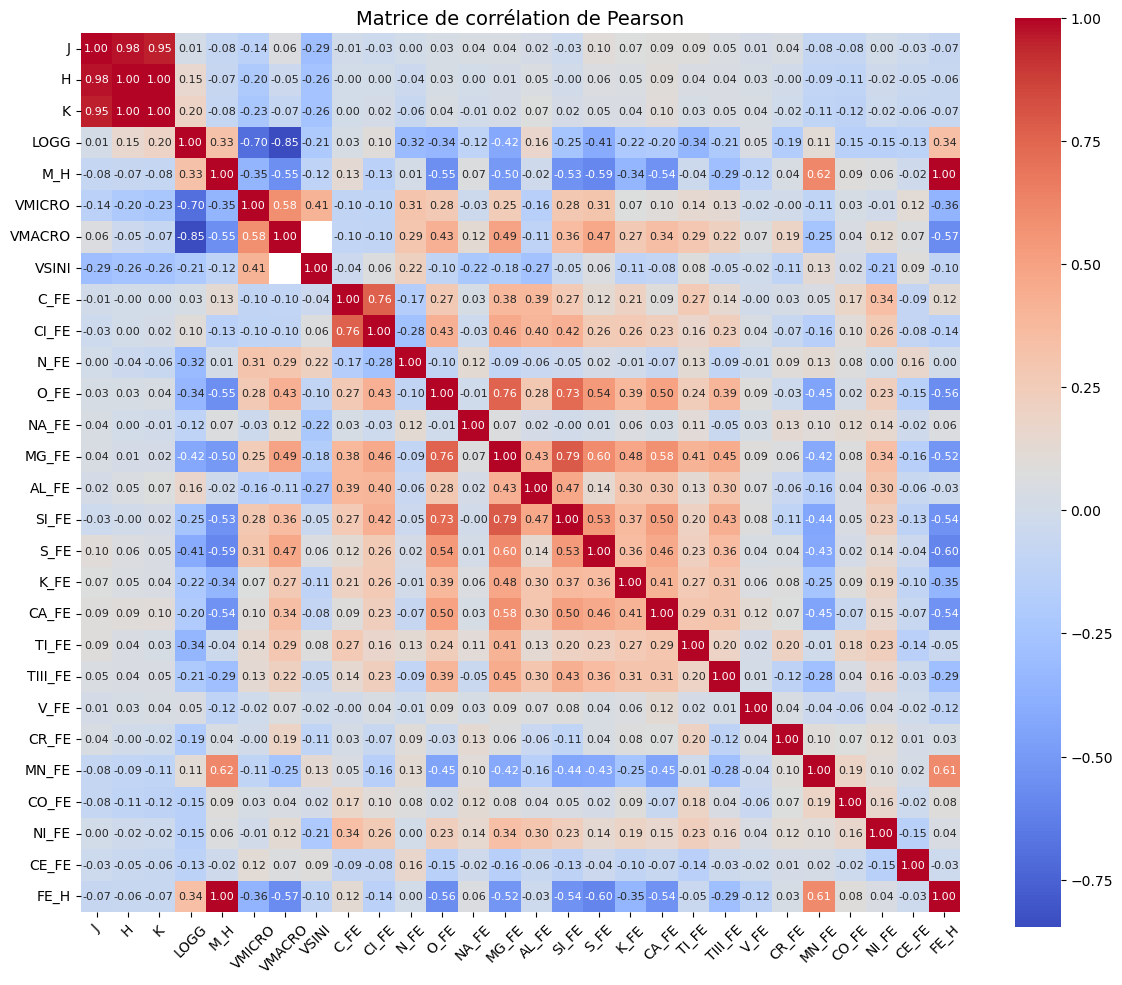

In [65]:
# Calculer la matrice de corrélation de Pearson
correlation_matrix = df_standardized.corr(method='pearson')

# Augmenter la taille de la figure et ajuster les paramètres pour une meilleure lisibilité
plt.figure(figsize=(12, 10))  # Taille de la figure
sns.heatmap(
    correlation_matrix,
    annot=True,               # Afficher les valeurs numériques
    fmt=".2f",                # Formater les nombres à 2 décimales
    annot_kws={"size": 8},    # Réduire la taille des annotations
    cmap='coolwarm',          # Palette de couleurs
    cbar=True,                # Afficher la barre de couleur
    square=True               # Garder les cellules carrées
)
plt.xticks(rotation=45, fontsize=10)  # Incliner les noms des colonnes pour éviter le chevauchement
plt.yticks(fontsize=10)               # Ajuster la taille des noms des lignes
plt.title("Matrice de corrélation de Pearson", fontsize=14)  # Titre plus lisible
plt.tight_layout()  # Réduire les marges
plt.show()

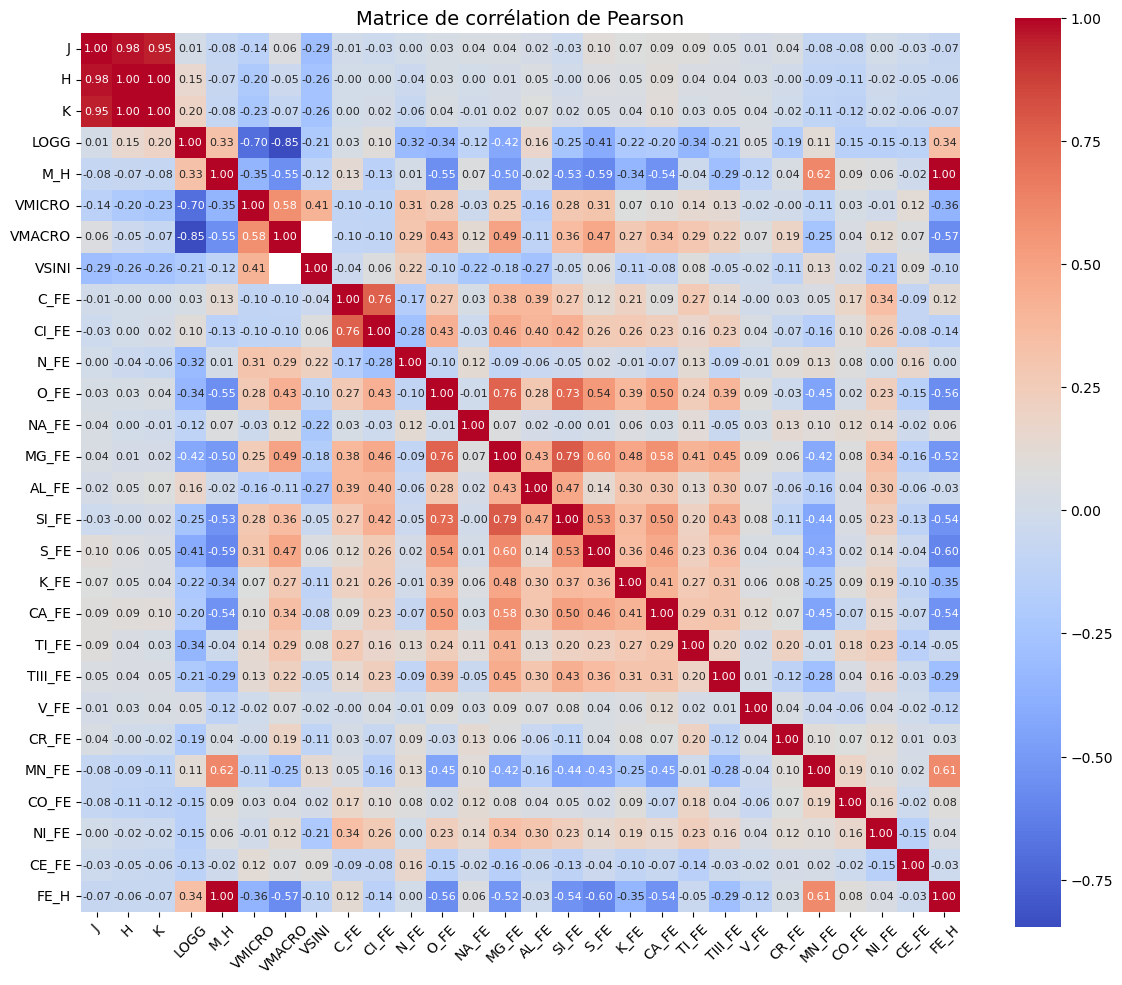

In [66]:
# Calculer la matrice de corrélation de Pearson
correlation_matrix = df_normalized.corr(method='pearson')

# Augmenter la taille de la figure et ajuster les paramètres pour une meilleure lisibilité
plt.figure(figsize=(12, 10))  # Taille de la figure
sns.heatmap(
    correlation_matrix,
    annot=True,               # Afficher les valeurs numériques
    fmt=".2f",                # Formater les nombres à 2 décimales
    annot_kws={"size": 8},    # Réduire la taille des annotations
    cmap='coolwarm',          # Palette de couleurs
    cbar=True,                # Afficher la barre de couleur
    square=True               # Garder les cellules carrées
)
plt.xticks(rotation=45, fontsize=10)  # Incliner les noms des colonnes pour éviter le chevauchement
plt.yticks(fontsize=10)               # Ajuster la taille des noms des lignes
plt.title("Matrice de corrélation de Pearson", fontsize=14)  # Titre plus lisible
plt.tight_layout()  # Réduire les marges
plt.show()

Normalisation en fonction de la méthode de machine learning : DBSCAN = MinMax / K-means et K-medoids = Standardisation